In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("SuperStoreOrders.csv")


In [6]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [7]:
df.columns = df.columns.str.strip()
df[['order_date', 'ship_date']].head()


,order_date,ship_date
0,1/1/2011,6/1/2011
1,1/1/2011,8/1/2011
2,1/1/2011,5/1/2011
3,1/1/2011,5/1/2011
4,1/1/2011,8/1/2011


Total sales per product = 


In [8]:
product_sales = (
    df.groupby('product_name')['sales']
    .sum()
    .sort_values(ascending=False)
)

product_sales.head(10)
#This shows Top 10 best-selling products.

product_name
Newell 334                                                                               9999991191699
Dana Swing-Arm Lamps                                                                       99932171717
Tenex Door Stop, Black                                             99881761231325317644192307881818160
Hon Training Table, with Bottom Storage                                                          99867
Boston School Pro Electric Pencil Sharpener, 1670                                    99741981869312499
Hamilton Beach Refrigerator, White                              9971,3457976641,9936641,3458974,136747
Eaton Memo Slips, Recycled                                               99643337273627414114382311464
Tenex Box, Blue                                      9959132233171493317991310417173317333322134513...
OIC Clamps, Metal                                                         9954402036801666804080405420
Advantus Stacking Tray, Durable                             

Worst-performing products =

In [9]:
product_sales.tail(10)
#These are products bringing least revenue

product_name
Tennsco 16-Compartment Lockers with Coat Rack                                                                  1,0371,5551,0372,5921,296
Star Micronics TSP100 TSP143LAN Receipt Printer                                                                                    1,036
Ikea Classic Bookcase, Traditional                                                     1,0291,1124122,4711,6474391,1121,8533711,2352,...
SanDisk Router, Bluetooth                                                              1,0258971031,282513771,2821,1964236846842051,0...
SanDisk Router, Erganomic                                                              1,0172801,7795081,0177622541692542547627625085...
Logitech Memory Card, Erganomic                                                        1,01240540121729202304812681352025063642232162...
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner                                                1,008
Barricks Round Table, with B

In [10]:
import matplotlib.pyplot as plt


In [11]:
print("plt is working")


plt is working


In [12]:
product_sales = (
    df.groupby('product_name')['sales']
    .sum()
    .sort_values(ascending=False)
)


In [13]:
df['sales'].dtype


dtype('O')

In [14]:
df['sales'].head()


0    408
1    120
2     66
3     45
4    114
Name: sales, dtype: object

In [15]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [16]:
df['sales'].dtype


dtype('float64')

In [17]:
product_sales = (
    df.groupby('product_name')['sales']
    .sum()
    .sort_values(ascending=False)
)


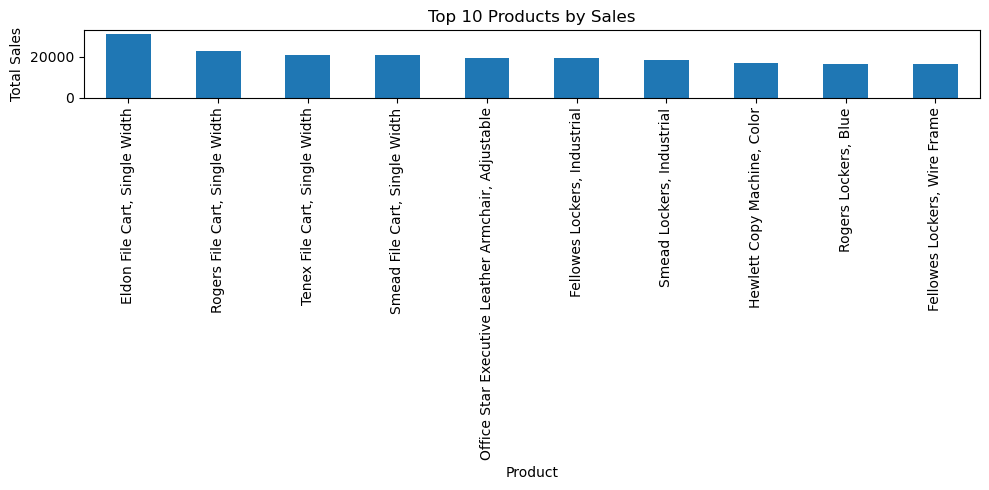

In [18]:
product_sales.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


In [19]:
product_sales.tail(10)


product_name
Global Adaptabilites Bookcase, Cherry/Storm Gray Finish                  0.0
Cisco 9971 IP Video Phone Charcoal                                       0.0
Ibico EPK-21 Electric Binding System                                     0.0
3D Systems Cube Printer, 2nd Generation, Magenta                         0.0
Chromcraft Conference Table, Fully Assembled                             0.0
High Speed Automatic Electric Letter Opener                              0.0
Chromcraft Computer Table, Rectangular                                   0.0
Panasonic KX MB2061 Multifunction Printer                                0.0
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    0.0
Cubify CubeX 3D Printer Double Head Print                                0.0
Name: sales, dtype: float64

##Month-wise Sales Analysis

In [20]:
df.columns


Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [21]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')


In [22]:
df['order_date'].isna().sum()


31223

In [23]:
df.loc[df['order_date'].isna(), 'order_date'].head(10)


162   NaT
163   NaT
164   NaT
165   NaT
166   NaT
167   NaT
168   NaT
169   NaT
170   NaT
171   NaT
Name: order_date, dtype: datetime64[ns]

In [24]:
df = df.dropna(subset=['order_date'])


In [25]:
df.loc[:, 'month'] = df['order_date'].dt.month


In [26]:
monthly_sales = df.groupby('month')['sales'].sum()
monthly_sales


month
1     139379.0
2     139241.0
3     177088.0
4     180976.0
5     214756.0
6     321325.0
7     200796.0
8     299666.0
9     350965.0
10    266514.0
11    395840.0
12    388465.0
Name: sales, dtype: float64

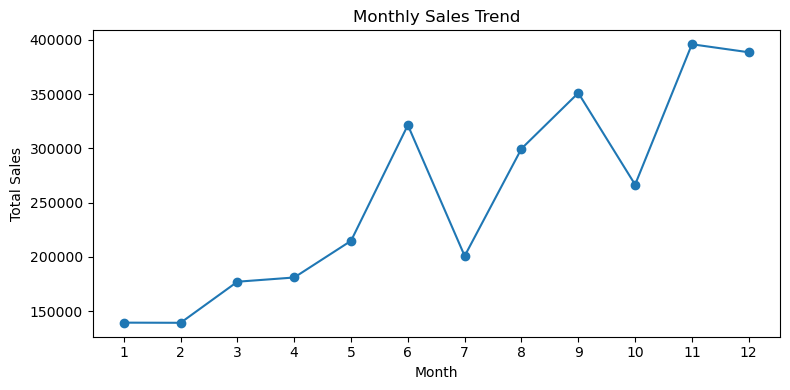

In [27]:
monthly_sales.plot(kind='line', marker='o', figsize=(8,4))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


In [28]:
product_sales.head(5)   # Top products
product_sales.tail(5)   # Worst products


product_name
High Speed Automatic Electric Letter Opener                              0.0
Chromcraft Computer Table, Rectangular                                   0.0
Panasonic KX MB2061 Multifunction Printer                                0.0
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    0.0
Cubify CubeX 3D Printer Double Head Print                                0.0
Name: sales, dtype: float64

In [29]:
'''
#Product-level insights
Product x = (Newell 308 ) drives most revenue → maintain stock and promote it.
Product Y = (Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac)sells very little → consider discounts, bundling, or removing it.
'''

'\n#Product-level insights\nProduct x = (Newell 308 ) drives most revenue → maintain stock and promote it.\nProduct Y = (Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac)sells very little → consider discounts, bundling, or removing it.\n'

In [30]:
monthly_sales.idxmax(), monthly_sales.idxmin()


(11, 2)

In [31]:
'''
Sales peak in Z = (nov) → plan inventory & marketing accordingly.

Sales dip in (FEB) → consider seasonal offers or promotions.
'''


'\nSales peak in Z = (nov) → plan inventory & marketing accordingly.\n\nSales dip in (FEB) → consider seasonal offers or promotions.\n'

In [32]:
#Top-selling product is X — focus promotions and stock on this.
#Lowest-selling product is Y — consider discount or removal.
#Peak sales month is Z — plan marketing campaigns.

In [33]:
df.to_csv("sales_cleaned.csv", index=False)
